###**Name: Bassma Hassan Hosny**



In [18]:
# Import required library:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np

In [9]:
# Read the Data:
iris_data=datasets.load_iris()
# Forming the iris dataframe
df=pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [10]:
# Setting the target:
y=iris_data.target

Exploratory Data Analysis:

In [11]:
# Generate descriptive statistics about the data: 
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b1b375650>,
      dtype=object)

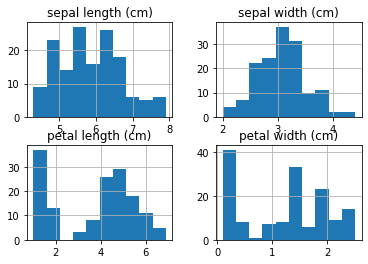

In [16]:
# Plot features histogram:
df.hist()

In [24]:
# Check target balance:
y = pd.Series(y)
y.value_counts()

0    50
1    50
2    50
dtype: int64

Decision Tree Classifier:

In [42]:
# Define the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(max_depth=2) # to prevent overfitting the data
DT.fit(df,y)

DecisionTreeClassifier(max_depth=2)

In [43]:
# Check the accuracy of the classifier:
from sklearn.metrics import accuracy_score
y_pred= DT.predict(df)
print("Acuuracy of Decision Tree Classifier = ", accuracy_score(y,y_pred))

Acuuracy of Decision Tree Classifier =  0.96


Visualization the Decision Tree Classifier:

In [35]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-1

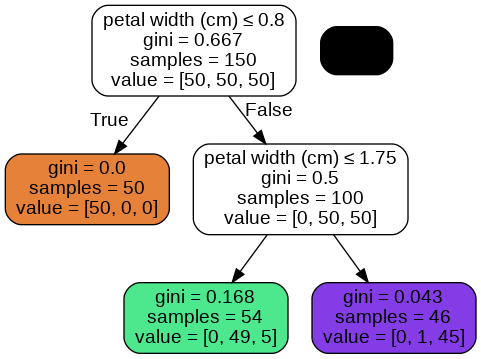

In [44]:
# Import necessary libraries for graph viz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, feature_names=iris_data.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())